In [1]:
# pip install jiwer seaborn matplotlib spacy
# python -m spacy download de_core_news_sm num2words
import json
import jiwer as ji
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import numpy as np

import string

In [2]:
src = pd.read_csv('test_public_ground_truth.csv')

In [3]:
src['sentence']=src['sentence'].str.replace(r"[{}]".format( string.punctuation), ' ')

In [4]:
fhnw = pd.read_csv('test_public_submission_fhnw.csv')


In [5]:
ude = pd.read_csv('test_public_submission_ude.csv')


In [6]:
uzh = pd.read_csv('test_public_submission_uzh.csv')


In [7]:
zhaw = pd.read_csv('test_public_submission_zhaw.csv')


In [8]:

for d1,ds in enumerate([fhnw, ude, uzh, zhaw]):
    wers= []
    lrs = []
    for i in range(len(src)):
        if pd.isnull(ds['sentence'].iloc[i]):
            sent=""
        else:
            sent=ds['sentence'].iloc[i]
        wer = ji.wer(src['sentence'].iloc[i], sent)
        length_ratio = len(sent)/len(src['sentence'].iloc[i])
        wers.append(wer)
        lrs.append(length_ratio)
    ds.loc[:,'wer'] = wers
    ds.loc[:,'length_ratio'] = lrs

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Length Ratio')]

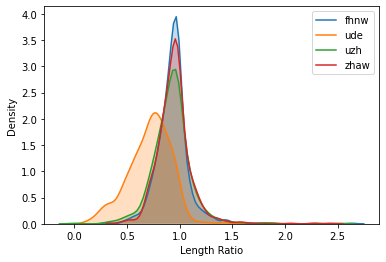

In [9]:
ax = sns.kdeplot(fhnw['length_ratio'], label="fhnw",shade=True, legend=True)
sns.kdeplot(ude['length_ratio'], label="ude",shade=True)
sns.kdeplot(uzh['length_ratio'], label="uzh",shade=True)
sns.kdeplot(zhaw['length_ratio'],label="zhaw", shade=True)

sns.set_style("whitegrid")
ax.set(xlabel='Length Ratio', ylabel='Density')


In [10]:
fhnw['wer'].mean(),ude['wer'].mean(),uzh['wer'].mean(),zhaw['wer'].mean()

(0.3606219724341026,
 0.5893871781984995,
 0.45445036533319655,
 0.4023165635259171)

In [11]:
pd.set_option('display.max_colwidth',150)

In [15]:
from num2words import num2words
nlp = spacy.load('de_core_news_sm')
for d1,ds in enumerate([src,fhnw, ude, uzh, zhaw]):
    snts=[]

    for i in range(len(src)):
        if pd.isnull(ds['sentence'].iloc[i]):
            snts.append(" ")
            continue
        snts.append(" ".join([num2words(token.text, lang="de") 
                              if token.pos_ =='NUM' and  token.text.isdigit() 
                              else token.text 
                              for token in nlp(ds.iloc[i]['sentence']) ]))
    ds['sentence_n'] = snts

In [16]:

for d1,ds in enumerate([fhnw, ude, uzh, zhaw]):
    wers= []
    for i in range(len(src)):
        if pd.isnull(ds['sentence'].iloc[i]):
            sent=""
        else:
            sent=ds['sentence_n'].iloc[i]
        wer = ji.wer(src['sentence_n'].iloc[i], sent)
        wers.append(wer)
    
    ds.loc[:,'wer_n'] = wers
    

In [17]:
fhnw.columns

Index(['path', 'sentence', 'wer', 'length_ratio', 'sentence_n', 'wer_n'], dtype='object')

In [18]:
fhnw['wer_n'].mean(),ude['wer_n'].mean(),uzh['wer_n'].mean(),zhaw['wer_n'].mean()

(0.36035760598611744,
 0.5893871781984995,
 0.4520553696345616,
 0.39489567094911526)

In [19]:
fhnw[fhnw['wer']<zhaw['wer']][['sentence','wer']]

,sentence,wer
3,wir sind aber froh dass der regierungsrat diese postulat annimmt,0.363636
4,die betreuungsverhältnisse bei den tagesschulen beträgt 10 im kindergarten bis 1 zu 22,0.428571
5,hier ist unseres erachtens auch noch anpassungspotenzial vorhanden,0.333333
6,diese erkenntnis hat sicher für die ganze schweiz gültig,0.111111
9,wir sind ebenfalls der meinung dass eine kassenhilfe eine kindergarten lehrkräfte in vielen bereichen unterstützen und entlasten kann,0.111111
11,deshalb ist der regierungsrat bekannt,0.800000
14,der zeitpunkt sind uns durchaus richtig und wichtig weil wir am ende der legislatur entgegennehmen und die neuen richtlinien der regierung irgendw...,0.333333
17,ich zitiere hier wörtlich aus dem protokoll der debatte vor fünf jahren meine altfunde mathias bromt das wir bei dieser debatte ganz besonders fällen,0.545455
18,nämlich der von münsingen an die dritte strasse geht in zukunft in ostermundigen,0.500000
19,bravo einer baudirektion für den mut die ein holzbau zu machen und auch für den mut einen solchen qualitativ hochstehenden wettbewerb durch,0.318182


In [20]:
src[fhnw['wer']<zhaw['wer']][['sentence']]

,sentence
3,wir sind jedoch froh dass der regierungsrat die drei postulate annimmt
4,das betreuungsverhältnis in den tagesschulen beträgt 1 10 und im kindergarten bis 1 22
5,hier ist unseres erachtens anpassungspotenzial vorhanden
6,diese erkenntnis hat sicher für die ganze schweiz gültigkeit
9,wir sind ebenfalls der meinung dass eine klassenhilfe eine kindergarten lehrkraft in vielen bereichen unterstützen und entlasten kann
11,sie sind beim regierungsrat vorausgegangen
14,der zeitpunkt scheint uns richtig und wichtig denn wir gehen dem ende der legislatur entgegen und die neuen richtlinien der regierung werden irg...
17,ich zitiere hier wörtlich aus dem protokoll der vor vier jahren geführten debatte aus dem jahr 2013 aus einem votum meines alten freundes mathias...
18,wer von münsingen an die reiterstrasse gelangen will steigt in zukunft in ostermundigen um
19,bravo auch an die baudirektion für den mut einen holzbau zu machen und auch für den mut einen qualitativ hochstehenden wettbewerb durchzuführen


In [21]:
zhaw[fhnw['wer']<zhaw['wer']][['sentence','wer']]

,sentence,wer
3,sind aber froh dass der regierungsrat die postulat annehmen,0.454545
4,die betreuungsverhältnis der tagesschulen beträgt eins zu zehn im kindergarten bis eins zu zweiundzwanzig,0.642857
5,hier ist unser erachten auch ein anpassungseifers,0.833333
6,diese erkenntnisse hat sicher für die ganze schweiz gültig,0.222222
9,wir sind ebenfalls der meinung dass eine kasse wölfe einen kindergarten lehrkräfte in vielen bereichen unterstützen und entlasten,0.277778
11,der vor der er regierungsrat bekannt,1.000000
14,der zeitpunkt sind uns durchaus richtig und wichtig weil wir amende der legislatur entgegen und die neuen richtlinien der regierung eigenen,0.375000
17,ich zitiere hier wörtlich aus dem protokoll der debatte vor fünf jahren wie alt freunde mathias tromelin dieser debatte ganz besonders felder,0.575758
18,die eier von münsingen an dritte strasse g schaffen wird in zukunft in ostermundigen umsteigen,0.571429
19,die raveline baudirektion um den mut diese holzbau zu machen und auch für den mut einen solchen qualitativ vorstehenden wettbewerb,0.409091


In [22]:
doc = nlp(src['sentence'].iloc[0])

In [23]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

vielen viel DET PIAT nk xxxx True True
dank danken ADP APPR ROOT xxxx True True
für für ADP APPR mo xxx True True
diese dies DET PDAT nk xxxx True True
grosse grosse NOUN NN nk xxxx True True
arbeit arbeit NOUN NN nk xxxx True False
im im ADP APPRART mnr xx True True
dienste dienste NOUN NN nk xxxx True False
unseres mein DET PPOSAT nk xxxx True False
kantons kantons NOUN NN ag xxxx True False


In [24]:
doc = nlp('ich bestelle ein Kamel, weil ich eins möchte und nicht 100 00  oder 01, oder sogar zweihundert.')

In [25]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

ich ich PRON PPER sb xxx True True
bestelle bestellen VERB VVFIN ROOT xxxx True False
ein einen DET ART nk xxx True True
Kamel Kamel NOUN NN oa Xxxxx True False
, , PUNCT $, punct , False False
weil weil SCONJ KOUS cp xxxx True True
ich ich PRON PPER sb xxx True True
eins eins PRON PIS oa xxxx True False
möchte mögen VERB VMFIN mo xxxx True True
und und CCONJ KON cd xxx True True
nicht nicht PART PTKNEG ng xxxx True True
100 100 NUM CARD nmc ddd False False
00 00 NUM CARD cj dd False False
    SPACE _SP    False False
oder oder CCONJ KON cd xxxx True True
01 01 NUM CARD cj dd False False
, , PUNCT $, punct , False False
oder oder CCONJ KON cd xxxx True True
sogar sogar ADV ADV mo xxxx True False
zweihundert zweihundert VERB VVPP cj xxxx True False
. . PUNCT $. punct . False False


In [26]:
src.iloc[4]

path                                                                                                              243.flac
sentence                          das betreuungsverhältnis in den tagesschulen beträgt 1 10  und im kindergarten bis 1 22 
sentence_n    das betreuungsverhältnis in den tagesschulen beträgt eins zehn   und im kindergarten bis eins zweiundzwanzig
Name: 4, dtype: object

In [27]:

" ".join([token.text if token.pos_ !='NUM' else num2words(token.text, lang="de") for token in nlp(src.iloc[4]['sentence']) ])

'das betreuungsverhältnis in den tagesschulen beträgt eins zehn   und im kindergarten bis eins zweiundzwanzig'

In [28]:
for i in range(len(src)):
    src.iloc[i]['sentence'] = " ".join([token.text if token.pos_ !='NUM' or token.text.isalpha()  else num2words(token.text, lang="de") for token in nlp(src.iloc[i]['sentence']) ])

InvalidOperation: [<class 'decimal.ConversionSyntax'>]

In [ ]:
src.iloc[i]

In [ ]:
sent=[]
for token in nlp(src.iloc[i]['sentence']):
    sent.append(token.text if token.pos_ !='NUM' or token.text.isalpha()  else num2words(token.text, lang="de"))

In [ ]:
token.text.isdigit()

In [ ]:
token.pos_

In [ ]:
'12'.isalpha()